# Character and word statistics

Import hungarian dataset from the Europarl corpus

In [1]:
with open("europarl-v7.hu-en.hu") as f:
    data=f.read()

## Character count

Implemented caracter counter function(1.0 version available in my GitHub)

In [2]:
def ccount(data):
    """Counts the caracters of the input data 
    and return with a dictionary"""

    dic = {}  # dictionary for the letters
    # read lines of the data
    for line in data:
        # python 3 reads in unicode, no decode needed
        line = line.rstrip()  # cuts eol character
        
        for letter in line:
            if (dic.get(letter) == None):
                # first of this letter, make new dict row
                dic[letter] = 1
            else:
                dic[letter] += 1
    return dic

In [3]:
let = ccount(data)

Print hungarian letters without collections

In [4]:
# Use the Hungarian letters
hunletters = "aábcdeéfghiíjklmnoóöőpqrstuúüűvwxyz"
for l in hunletters:
    if (let.get(l) != None):
        print(l+'\t'+str(let.get(l)))

a	6840021
á	2886283
b	1387471
c	440233
d	1281426
e	7894051
é	2990777
f	615501
g	2871752
h	1144215
i	3376987
í	436824
j	870237
k	4188091
l	5188434
m	2472473
n	4771358
o	3438481
ó	893015
ö	917330
ő	686808
p	857815
q	614
r	3135243
s	4987457
t	5953707
u	800158
ú	251007
ü	542149
ű	118122
v	1376381
w	4580
x	12050
y	1749436
z	3678700


Store all character count in reversed order

In [5]:
with open("ccount1.txt",'w') as f:
    for l in sorted(let, key=let.get, reverse=True):
        f.write(l+'\t'+str(let[l])+'\n')

### Using standard library
* Collections for the counter
* re to delete whitespaces with Regular Expression

In [6]:
import collections
import re

In [7]:
formatedData = re.sub(r"\s+", "", data, flags=re.UNICODE)
formatedData = formatedData.lower()
cCnt = collections.Counter()

for c in formatedData:
    cCnt[c]+=1

In [8]:
with open("ccount2.txt",'w') as f:
    for c in cCnt.most_common():
        f.write(c[0]+'\t'+str(c[1])+'\n')

### Visualization
* Using matplotlib for the visualisation
* Using numpy for the array manipulation

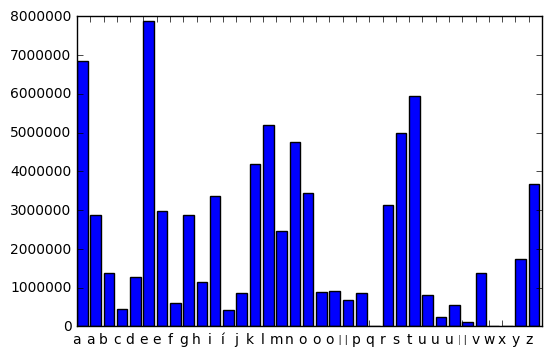

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

lts = np.ones(35)
for i in range(len(hunletters)):
    lts[i]=let.get(hunletters[i])
    
plt.bar(range(0,35), lts)
plt.xticks(range(0,35), hunletters)
plt.show()

## Word count

Formating the words into set of lowercase strings

In [10]:
words = data.split()
for i in range(len(words)):
    #for w in words: makes a copy and hard to find its origin
    words[i]=words[i].strip()

In [11]:
def wcount(data):
    """Counts the words of the input set 
    and return with a dictionary"""

    dic = {}  # dictionary for the words
    # read rows of the data
    for word in data:
        if (dic.get(word) == None):
            # first of this word, make new dict row
            dic[word] = 1
        else:
            dic[word] += 1
    return dic

In [12]:
wor = wcount(words)

In [13]:
with open("wcount1.txt",'w') as f:
    for w in sorted(wor, key=wor.get, reverse=True):
        f.write(w+'\t'+str(wor[w])+'\n')

### Using standard library

In [14]:
import collections

In [15]:
wCnt = collections.Counter()
for w in words:
    wCnt[w]+=1

In [16]:
with open("wcount2.txt",'w') as f:
    for w in wCnt.most_common():
        f.write(w[0]+'\t'+str(w[1])+'\n')

## Text cleaning
* lower the letters
* delete punctuation
* convert numbers to _NUM_ tokens

In [17]:
import string

In [18]:
def cleaning(data):
    """Text cleaning: 
        lower the letters
        punctuation
        numbers to _NUM_ tokens"""
    formated_data = data.lower()
    #remove elements in string.punctation with regex
    formated_data = re.sub('['+string.punctuation+']', '', formated_data)
    #replace 1..n number with regex
    #\d = string.digits
    formated_data = re.sub('[\d*\,?\d*]+','_NUM_',formated_data)
    return formated_data

In [19]:
text = "Mit sütsz kis szűcs, tán sós 99 húst sütsz kis 1 2 3 szűcs? Egyszer 1,5 királyfi, elment 4e5 kapálni! To-to-roo! Steins;Gate"
cleaning(text)

'mit sütsz kis szűcs tán sós _NUM_ húst sütsz kis _NUM_ _NUM_ _NUM_ szűcs egyszer _NUM_ királyfi elment _NUM_e_NUM_ kapálni totoroo steinsgate'

In [20]:
data2=cleaning(data)

### Character count

In [21]:
let2 = ccount(data2)

with open("ccount_formated.txt",'w') as f:
    for l in sorted(let2, key=let2.get, reverse=True):
        f.write(l+'\t'+str(let2[l])+'\n')

### Word count

In [22]:
words2 = data2.split()

In [23]:
for i in range(len(words2)):
    #for w in words: makes a copy and hard to find its origin
    words2[i]=words2[i].strip()
    
wor2= wcount(words2)
with open("wcount_formated.txt",'w') as f:
    for w in sorted(wor2, key=wor2.get, reverse=True):
        f.write(w+'\t'+str(wor2[w])+'\n')

## Long tail
Replace rare words with tokens

In [24]:
def remove_rare(data, rare_threshold=5,rare_token="_RARE_"):
    """Replace rare words with token"""
    data_count = wcount(data)
    
    
    for i in range(len(data)):
        if data_count[data[i]]<rare_threshold:
            data[i]=rare_token
        
    return data

In [25]:
asd = "A A A A A A A A A B B B B B C C D D D D D D E F F GGG GGG GGG GGG GGG"
asd_split = asd.split()
for i in range(0,12000):
    asd_split.append("K")

In [26]:
remove_rare(asd_split);

### Word count with long tail replacement

In [27]:
words3 = remove_rare(words2)

wor3= wcount(words3)
with open("wcount_replaced.txt",'w') as f:
    for w in sorted(wor3, key=wor3.get, reverse=True):
        f.write(w+'\t'+str(wor3[w])+'\n')

In [28]:
len(data2)

93513264